***Nama : Arif Wijaksono***
***Nim : 2109106129***

***POSTTEST 5 KB***

Link Dataset:https://drive.google.com/file/d/15ls7zvwLXqwn662OXkCoq7cglbqcf1PS/view?usp=drive_link

***Import Library yang diperlukan***

menggunakan library yang diperlukan pada pengimplementasian metode-metode yang digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

***Info Data***

In [4]:
data = pd.read_csv('Customer-Churn-Records.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


***Mengurangi jumlah dataset dikarenakan jumlah data yang berlebih***

In [5]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.drop(df.index[1500:8500], inplace=True)

***Supervised Learning***

***Support Vector Classifier (SVM)***

digunakan pada label kategorikal

***Mengambil 2 fitur untuk Binary Classification***

In [6]:
X = df[['CreditScore', 'Age']]
y = df['Geography']

Membagi data (split) ke train set dan test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membuat objek classifier SVM

In [8]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [9]:
svm.fit(X_train, y_train)

SVC()

Melakukan prediksi data test dengan model

In [10]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vectors dan indeksnya

In [11]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

***Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda***

ValueError: cannot reshape array of size 12500 into shape (50,50)

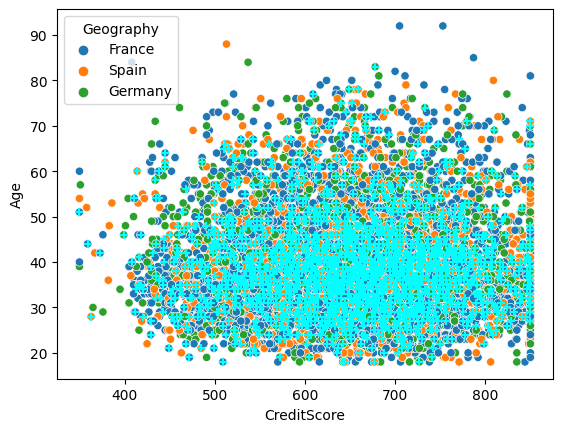

In [14]:
sns.scatterplot(x='CreditScore', y='Age', hue='Geography', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

***Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.***

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      France       0.48      1.00      0.65       434
     Germany       0.00      0.00      0.00       245
       Spain       0.00      0.00      0.00       221

    accuracy                           0.48       900
   macro avg       0.16      0.33      0.22       900
weighted avg       0.23      0.48      0.31       900



C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

***Linear Regression***

Memisahkan fitur dan target dari dataset



In [36]:
X, y = df[['Age']], df['CreditScore']

Membagi data fitur dan target menjadi data training

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

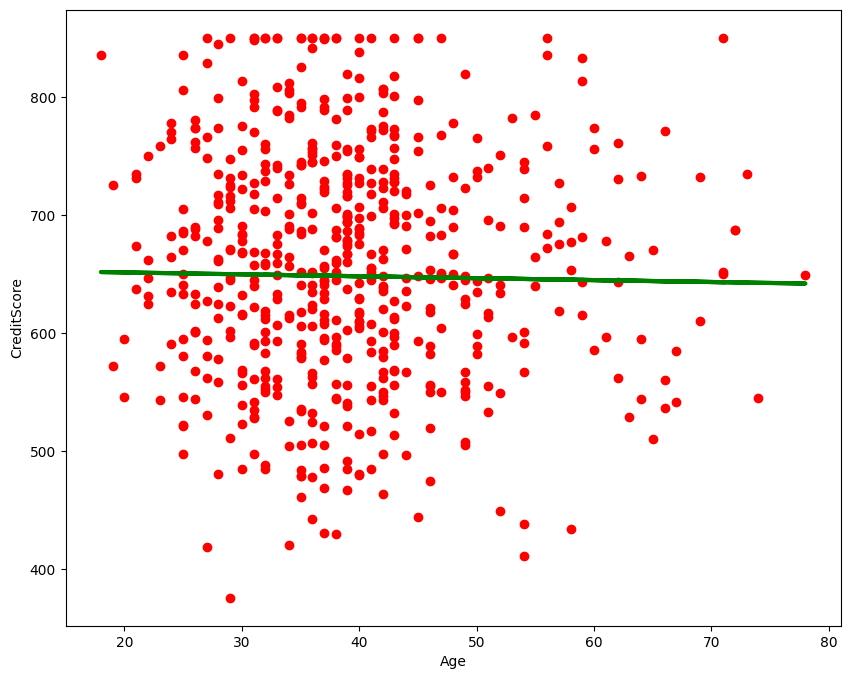

In [40]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='green', linewidth=3)
plt.scatter(X_test, y_test, c='red')
plt.xlabel("Age")
plt.ylabel("CreditScore")
plt.show()

Membuat objek classifier SVM

In [41]:
svm = SVC(kernel="linear")

Melatih classifier dengan data train

In [42]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

melakukan prediksi data test dengan model dan menampilkan hasi

In [43]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 188.05
MSE : 45249.39333333333
RMSE : 212.71904788554627
R-Squared : -3.6453526338397246


***Unsupervised Learning***

K-Means
Menggunakan fitur X dan menentukan banyaknya kelompok

In [27]:
X = df[["Age", "CreditScore"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [28]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [29]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

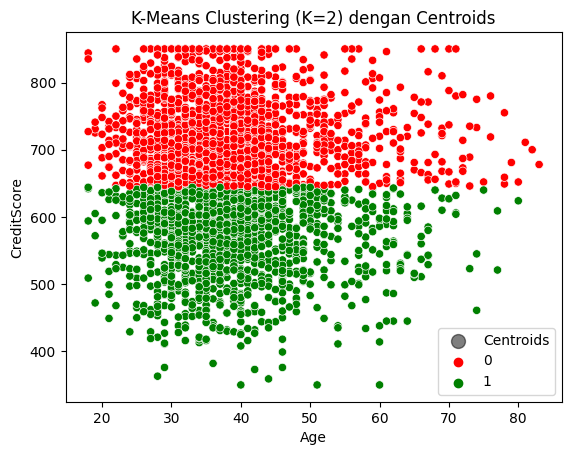

In [30]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="Age", y="CreditScore", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("CreditScore")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [31]:
cross_tab = pd.crosstab(df["cluster"], df["Geography"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Geography  France  Germany  Spain
cluster                          
0             778      435    411
1             717      327    332 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [32]:
ari = adjusted_rand_score(df["Geography"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): -0.00


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [33]:
true_labels_num = df["Geography"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [34]:
homogeneity = homogeneity_score(df["Geography"], cluster_labels)
completeness = completeness_score(df["Geography"], cluster_labels)
v_measure = v_measure_score(df["Geography"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.00
Completeness Score: 0.00
V-Measure Score: 0.00
